In [1]:
import os.path as osp
import os
import matplotlib.pylab as plt
from tf_lab.icml.ae_farm_helper import relevant_class

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [3]:
top_in_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/momentum_search/nb_gan_ae_12_emd_chair_2048_best_epoch/'
ae_loss = 'emd'

experiments_names = [name for name in os.listdir(top_in_dir)]
experiments_dir = [osp.join(top_in_dir, name) for name in os.listdir(top_in_dir)]

print experiments_names


['nb_gan_ae_14_emd_chair_2048_best_epoch', 'nb_wgan_gp_ae_10_emd_chair_2048_max_min_epoch', 'momentum_search', 'nb_wgan_gp_ae_14_emd_chair_2048_best_epoch', 'nb_gan_ae_4_chamfer_chair_2048_best_epoch', 'nb_gan_ae_12_emd_chair_2048_max_min_epoch', 'nb_gan_ae_8_chamfer_chair_2048_best_epoch', 'nb_gan_ae_12_emd_chair_2048_best_epoch', 'nb_wgan_gp_ae_11_emd_chair_2048_max_min_epoch', 'nb_wgan_gp_ae_11_emd_chair_2048_best_epoch', 'nb_gan_ae_7_chamfer_chair_2048_max_min_epoch', 'nb_gan_ae_13_emd_chair_2048_max_min_epoch', 'nb_wgan_gp_ae_12_emd_chair_2048_best_epoch', 'nb_gan_ae_11_emd_chair_2048_best_epoch', 'nb_gan_ae_10_emd_chair_2048_max_min_epoch', 'nb_gan_ae_6_chamfer_chair_2048_max_min_epoch', 'nb_gan_ae_5_chamfer_chair_2048_best_epoch', 'nb_wgan_gp_ae_12_emd_chair_2048_max_min_epoch', 'nb_gan_ae_11_emd_chair_2048_max_min_epoch', 'nb_wgan_gp_ae_13_emd_chair_2048_max_min_epoch', 'nb_gan_ae_6_chamfer_chair_2048_best_epoch', 'nb_gan_ae_4_chamfer_chair_2048_max_min_epoch', 'nb_gan_ae_13_em

In [5]:
# prefix = 'nb_gan_ae_'
# ae_name_to_id = lambda ae_name: int(ae_name[len(prefix):len(prefix)+2])
epochs_used = [1, 3, 10, 30, 100, 300, 400, 500]

In [7]:
stats = dict()

for ex_dir, ex_name in zip(experiments_dir, experiments_names):    
    jsd_file = osp.join(ex_dir, 'jsd_stats.txt')
    stats[ex_name] = []
    with open(jsd_file, 'r') as fin:        
        fin.readline ()  # first line is comment.
        for line in fin:
            meas = float(line.rstrip().split(' ')[2])
            stats[ex_name].append(meas)

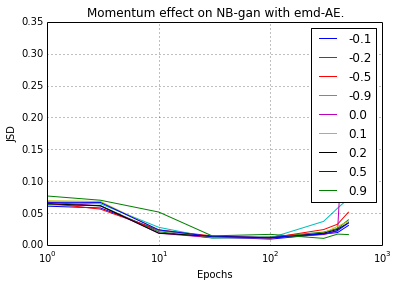

In [8]:
keys = sorted(stats.keys())
for name in keys:
    plt.semilogx(epochs_used, stats[name])
    
plt.legend(keys)
plt.title('Momentum effect on NB-gan with %s-AE.' % (ae_loss,))
plt.ylabel('JSD')
plt.xlabel('Epochs')
plt.grid(True)
plt.tick_params(axis='x', which='both', bottom='off', top='off')
plt.tick_params(axis='y', which='both', left='off', right='off')

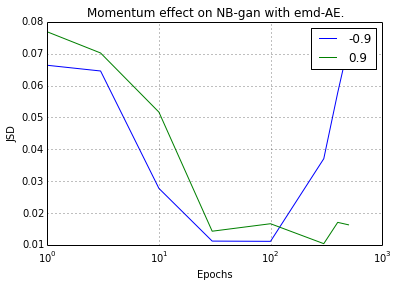

In [14]:
# sub_keys = ['-0.1', '0.1']
# sub_keys = ['-0.5', '0.5']
sub_keys = ['-0.9', '0.9']
for name in sub_keys:
    plt.semilogx(epochs_used, stats[name])
    
plt.legend(sub_keys)
plt.title('Momentum effect on NB-gan with %s-AE.' % (ae_loss,))
plt.ylabel('JSD')
plt.xlabel('Epochs')
plt.grid(True)
plt.tick_params(axis='x', which='both', bottom='off', top='off')
plt.tick_params(axis='y', which='both', left='off', right='off')